In [1]:
import numpy as np
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
! python3 ../snaps.py

python3: can't open file '/Users/marcsilverman/School/MachineLearning/ml_project/src/../snaps.py': [Errno 2] No such file or directory


In [3]:
! pip install polars-lts-cpu


In [5]:
df = pd.read_parquet("../raw_data/all_header_file_data.parquet.snappy")
df.head

<bound method NDFrame.head of       patient_id   age     sex           snomed_concept_name
0        JS24996  66.0  Female             Sinus bradycardia
1        JS24966  46.0    Male                 ST Depression
2        JS24966  46.0    Male               Inverted T wave
3        JS24966  46.0    Male             Sinus bradycardia
4        JS24966  46.0    Male  Left ventricular hypertrophy
...          ...   ...     ...                           ...
86387    JS10474  65.0    Male  Supraventricular tachycardia
86388    JS10439  87.0  Female     Right bundle branch block
86389    JS10439  87.0  Female  Supraventricular tachycardia
86390    JS10422  52.0  Female  Supraventricular tachycardia
86391    JS10486  59.0  Female  Supraventricular tachycardia

[86392 rows x 4 columns]>

In [6]:
df_clean = df.dropna()

In [7]:
print(df_clean.shape)

(86243, 4)


In [8]:
valid_genders = ['Male', 'Female']
df_1 = df_clean[df_clean['sex'].isin(valid_genders)]
df_1.shape

(86239, 4)

In [9]:
from sklearn.neighbors import KernelDensity


In [10]:
print("Shape of DataFrame:", df_1.shape)
total = 0
# Check the number of samples for each category of 'snomed_concept_name'
for snomed_concept_name, group in df_1.groupby('snomed_concept_name'):
    print("Category:", snomed_concept_name, "- Number of samples:", len(group))
    total += len(group)
print("total", total)

Shape of DataFrame: (86239, 4)
Category: First degree atrioventricular block - Number of samples: 1140
Category: Second degree atrioventricular block - Number of samples: 66
Category: Mobitz type I incomplete atrioventricular block - Number of samples: 31
Category: Mobitz type II atrioventricular block - Number of samples: 0
Category: Complete atrioventricular block - Number of samples: 76
Category: Atrial bigeminy - Number of samples: 3
Category: Left axis deviation - Number of samples: 1543
Category: Premature atrial contraction - Number of samples: 1311
Category: Q wave abnormal - Number of samples: 1062
Category: Right axis deviation - Number of samples: 847
Category: Atrioventricular block - Number of samples: 244
Category: Counterclockwise cardiac rotation - Number of samples: 162
Category: Clockwise cardiac rotation - Number of samples: 76
Category: Early repolarization - Number of samples: 366
Category: F wave present - Number of samples: 3
Category: Non-specific intraventricul

/var/folders/cs/48rd607d56dgkby39r27lkdr0000gn/T/ipykernel_25704/656915554.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for snomed_concept_name, group in df_1.groupby('snomed_concept_name'):


In [11]:
df = pd.get_dummies(df_1, columns=['sex'])
df.head(2)
df.drop(columns=['sex_Unknown'], inplace=True)

df.head(2)

patient_id   age snomed_concept_name  sex_Female  sex_Male
0    JS24996  66.0   Sinus bradycardia        True     False
1    JS24966  46.0       ST Depression       False      True

In [12]:
import matplotlib.pyplot as plt


/var/folders/cs/48rd607d56dgkby39r27lkdr0000gn/T/ipykernel_25704/1307770861.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for snomed_concept_name, group_data in selected_data.groupby('snomed_concept_name'):
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


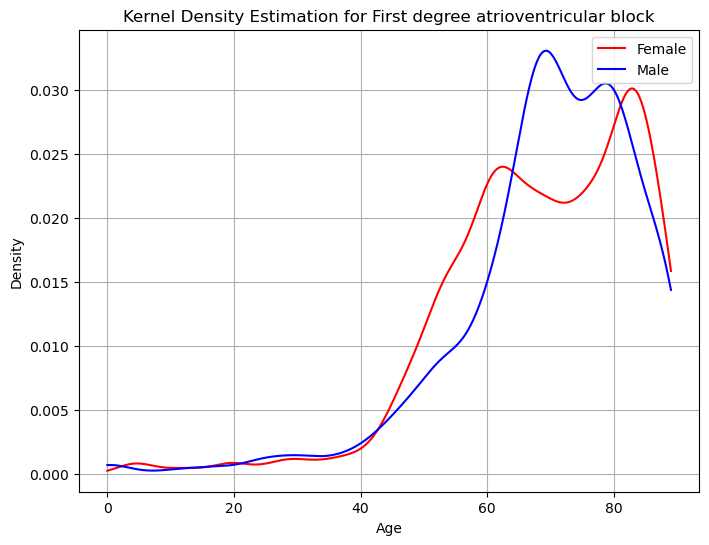

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


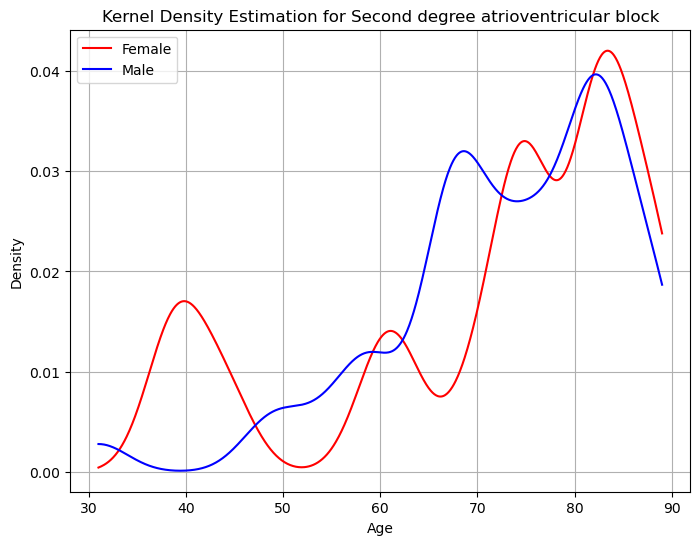

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


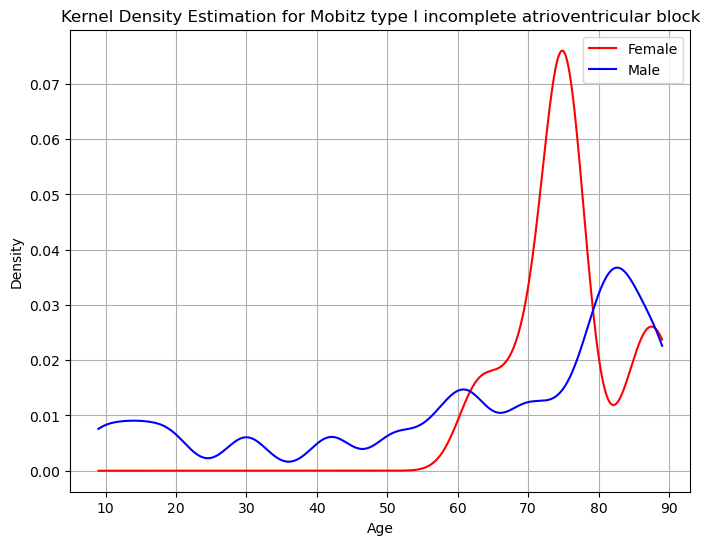

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


Not enough data for 'Mobitz type II atrioventricular block' category.


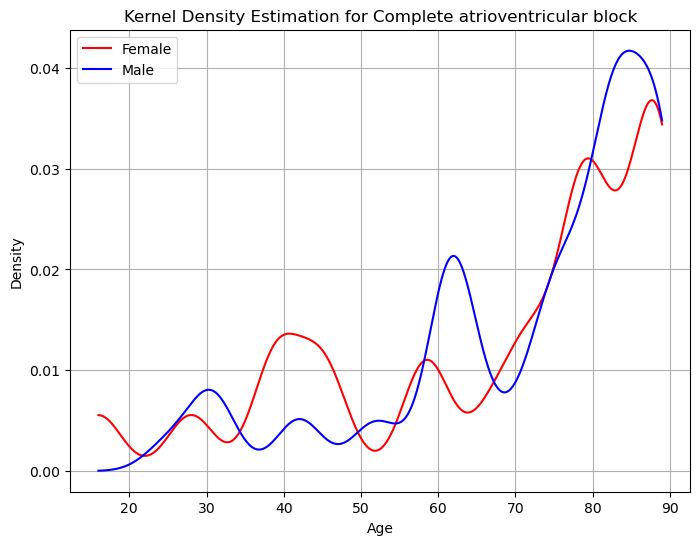

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


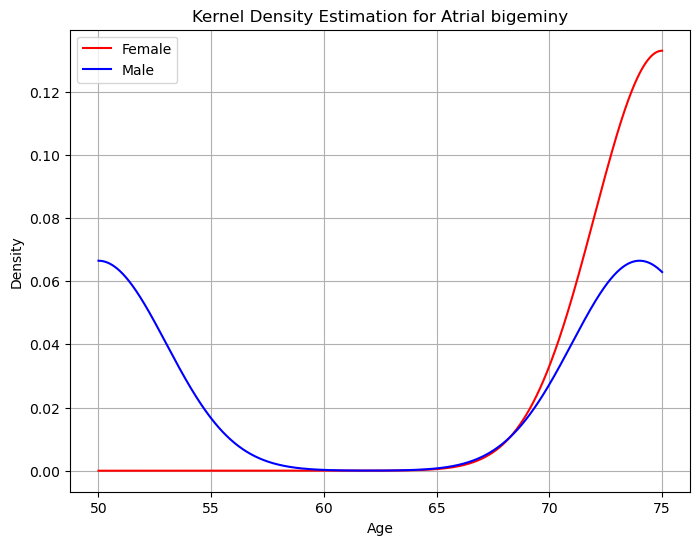

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


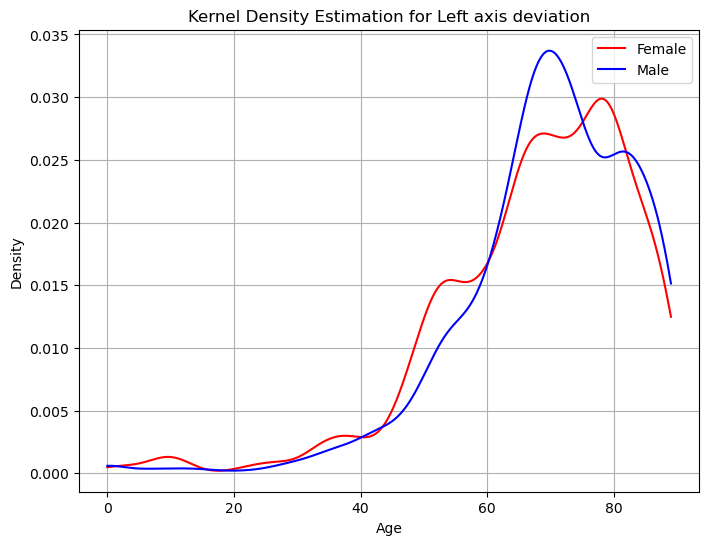

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


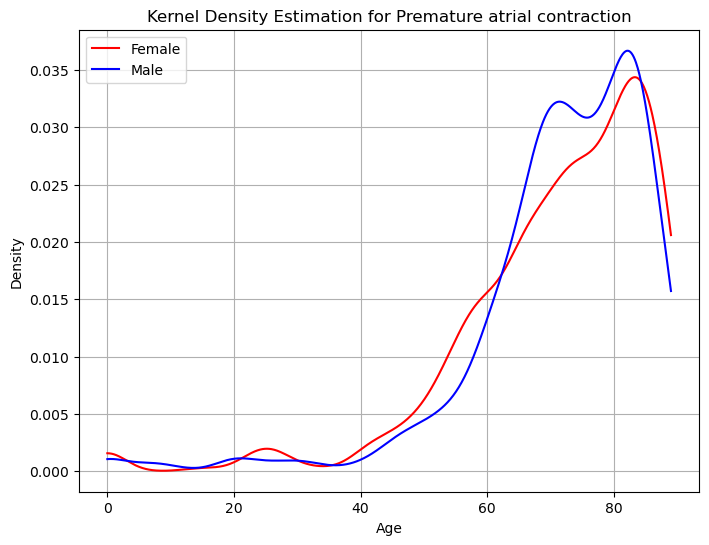

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


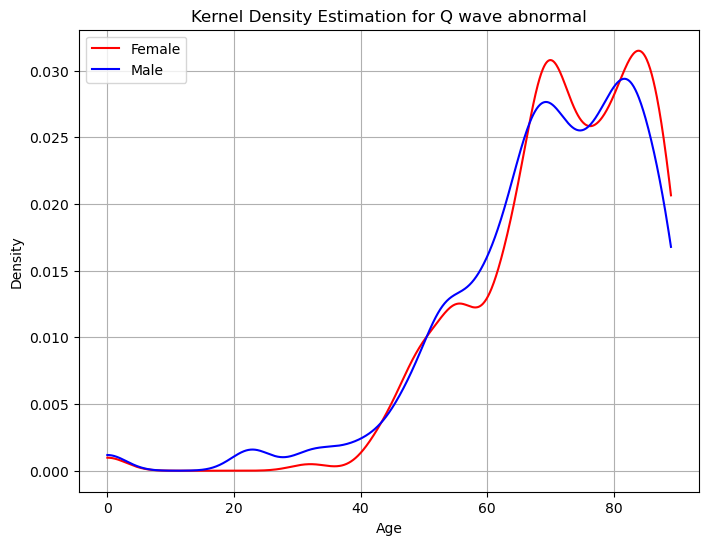

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


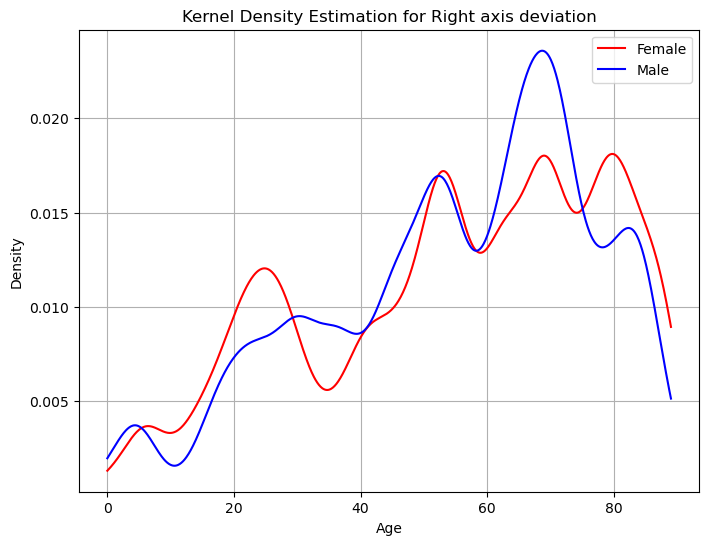

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


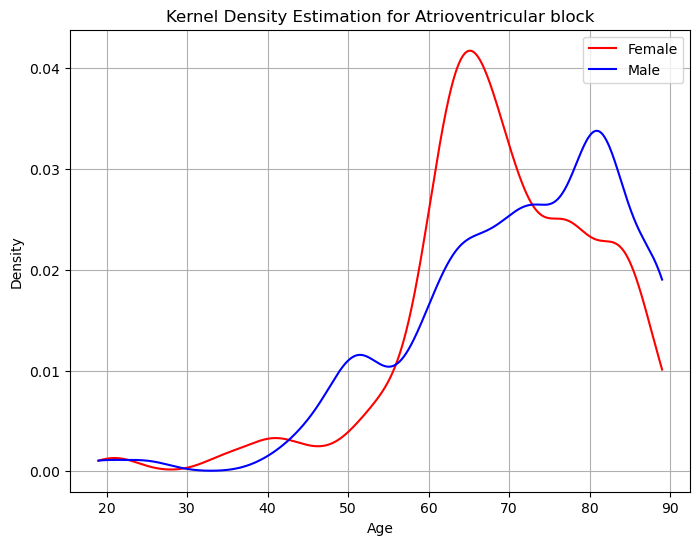

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


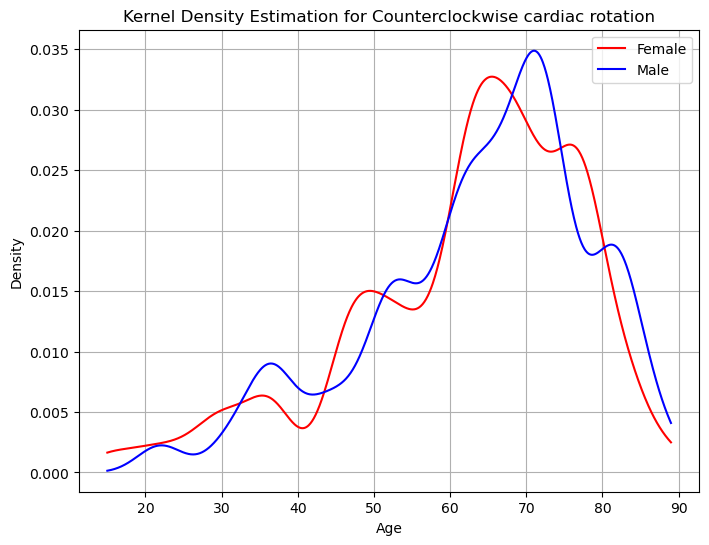

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


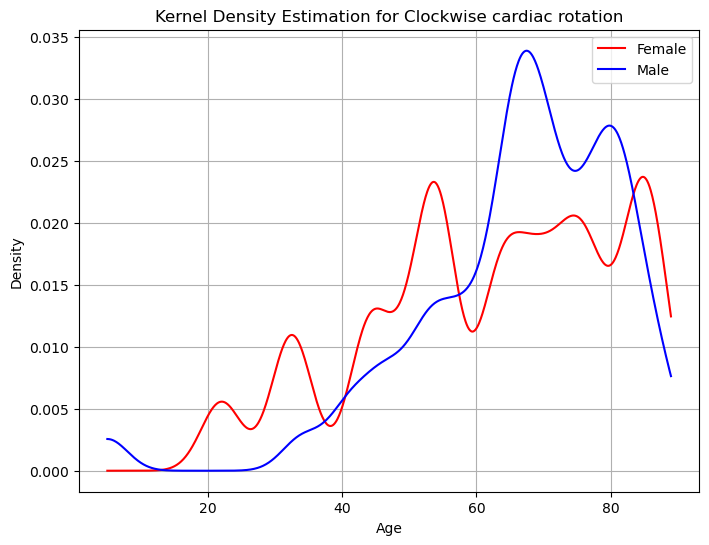

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


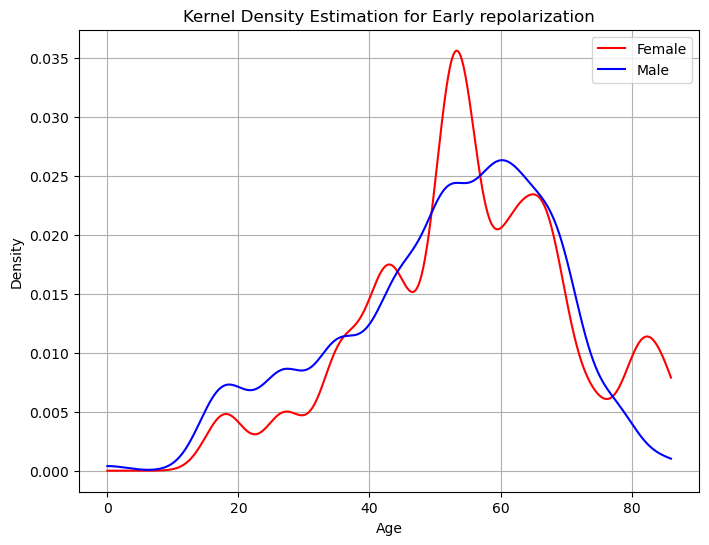

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


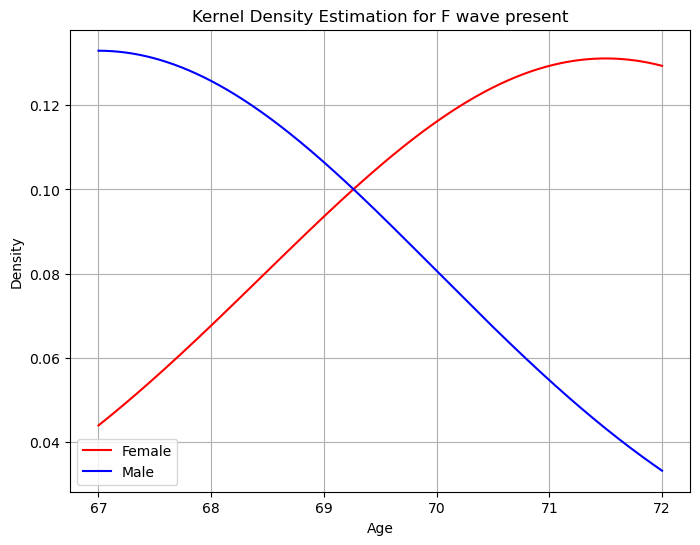

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


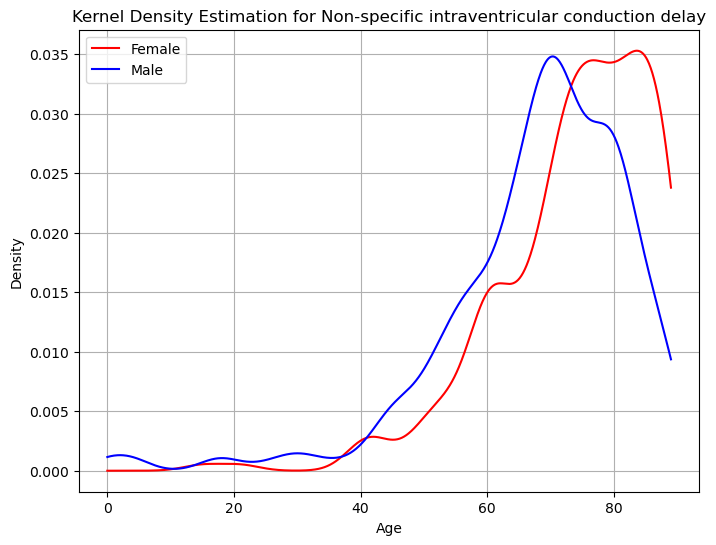

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


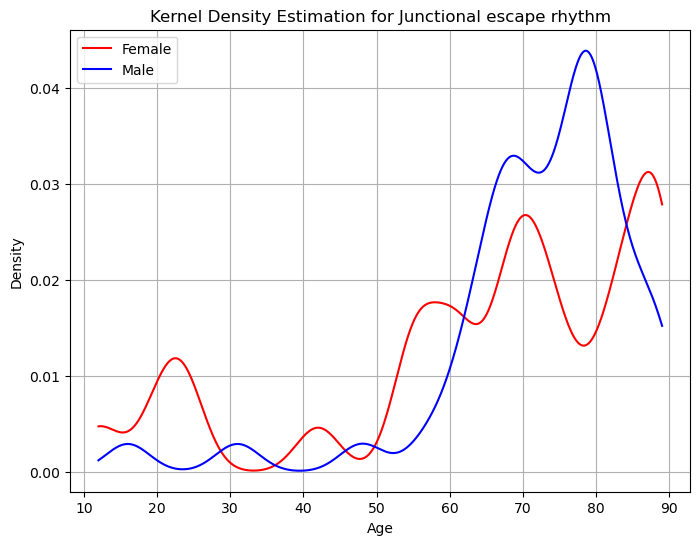

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


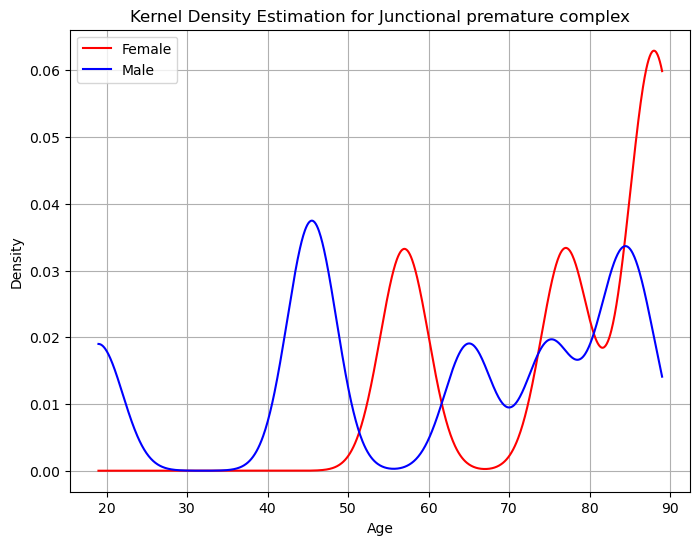

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


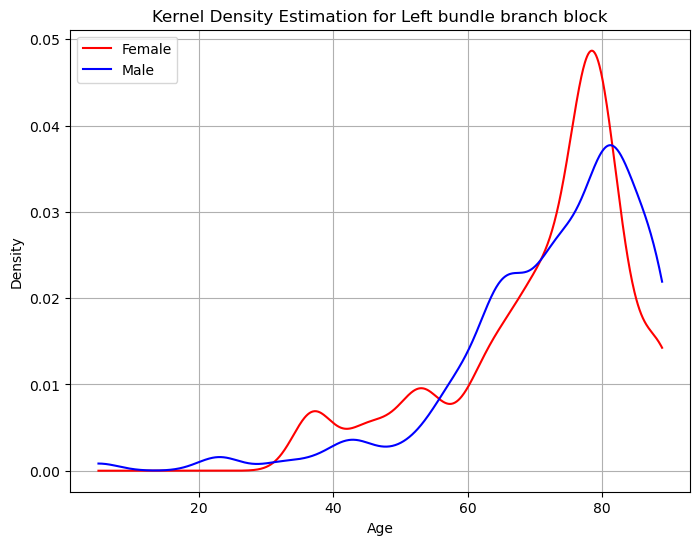

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


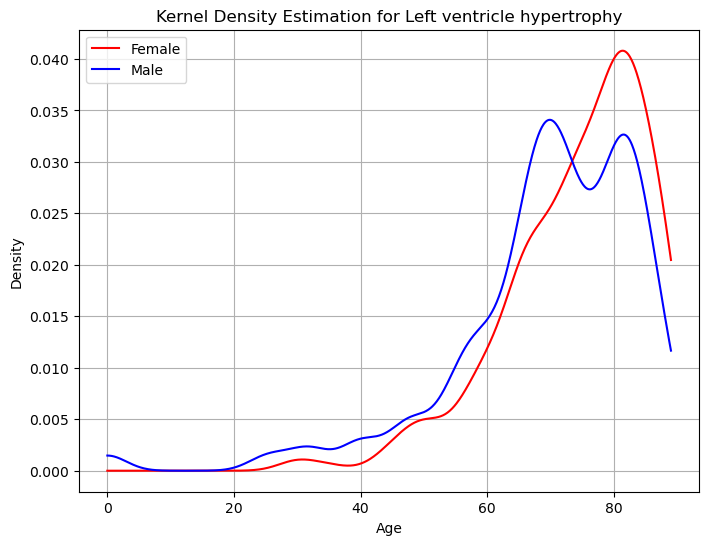

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


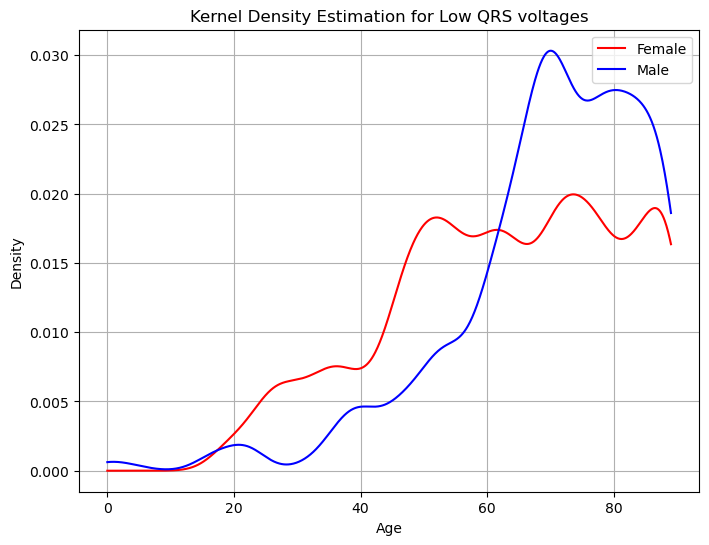

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


Not enough data for 'Low QRS voltages in the precordial leads' category.
Not enough data for 'Low QRS voltages in the limb leads' category.


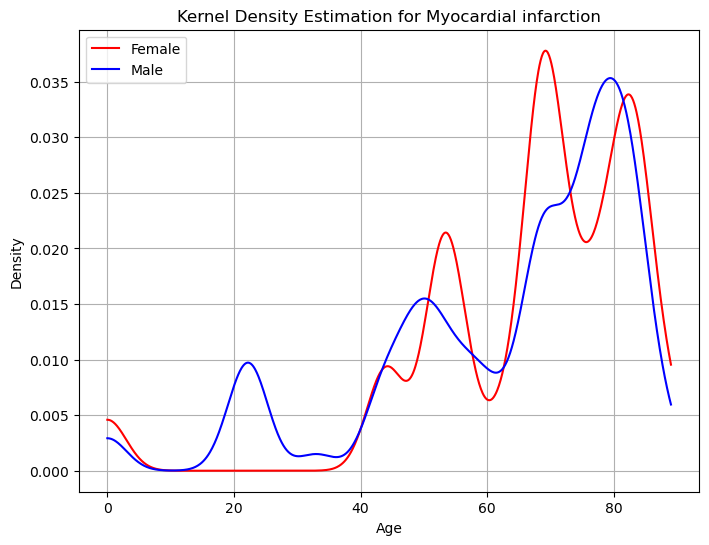

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


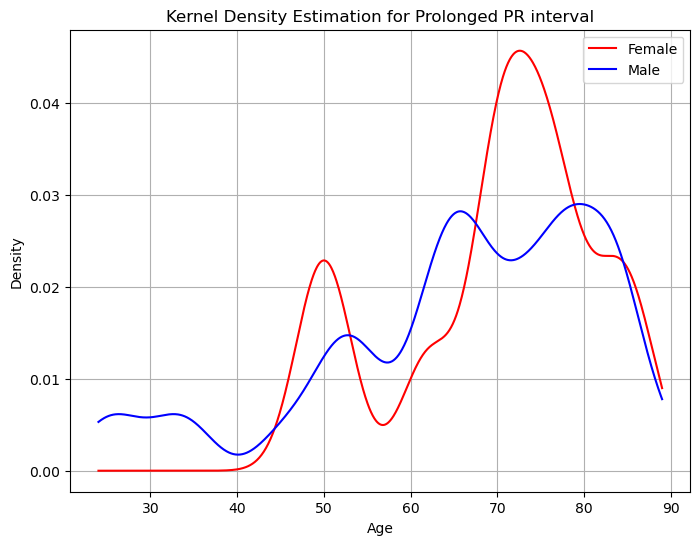

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


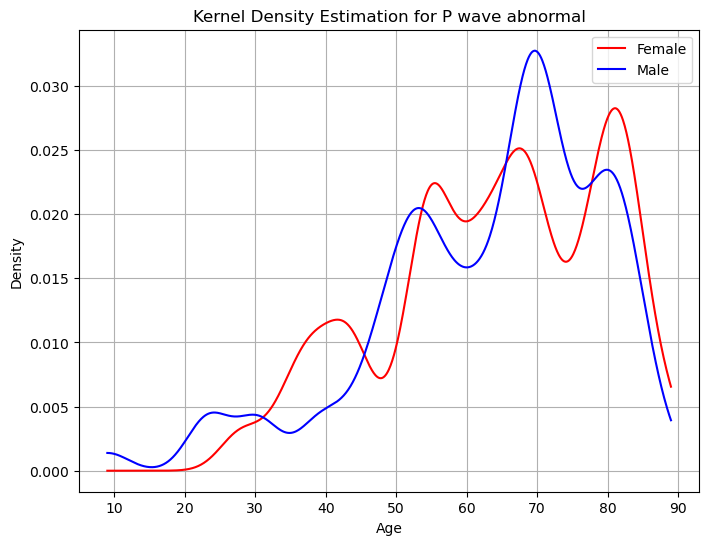

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


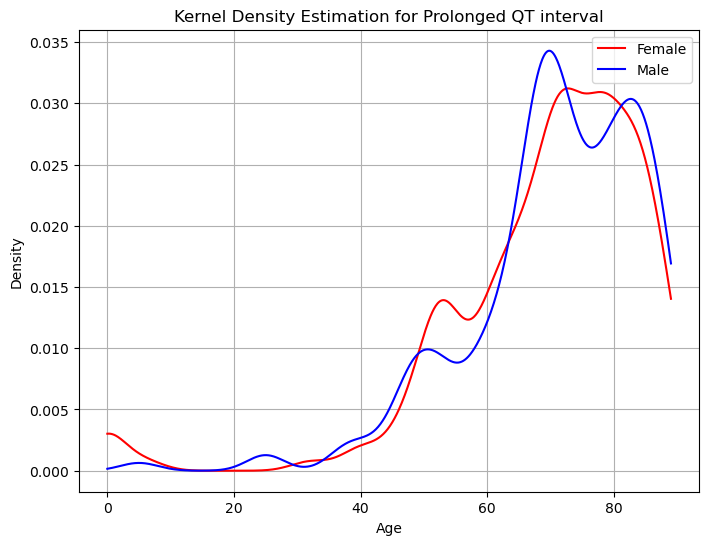

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


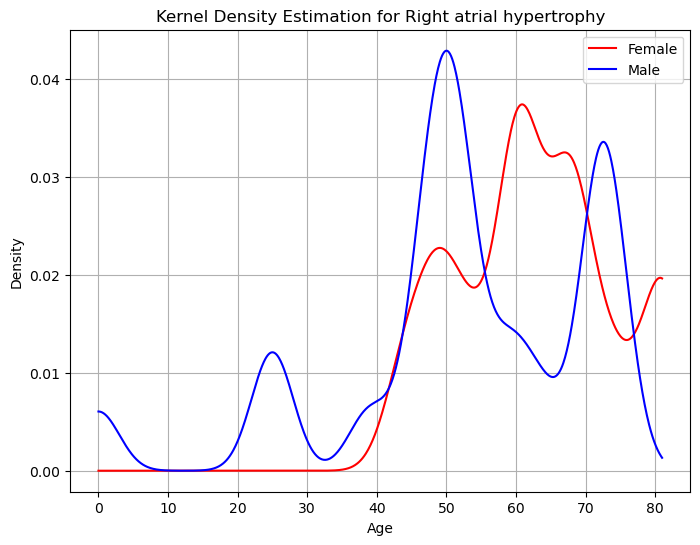

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


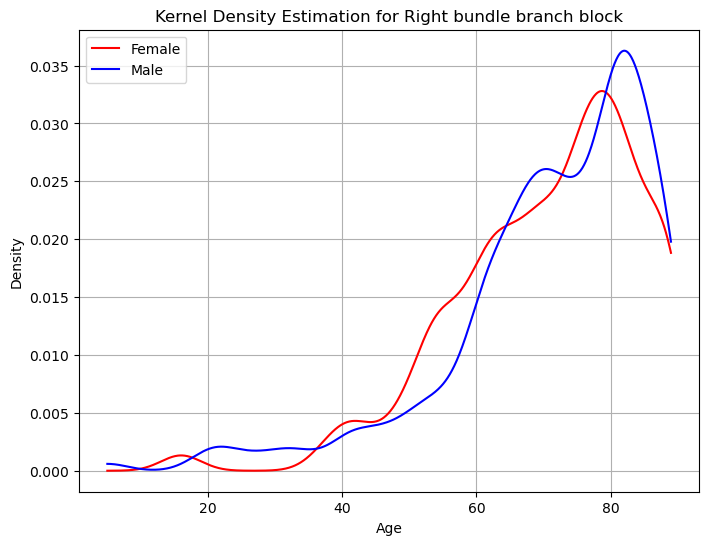

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


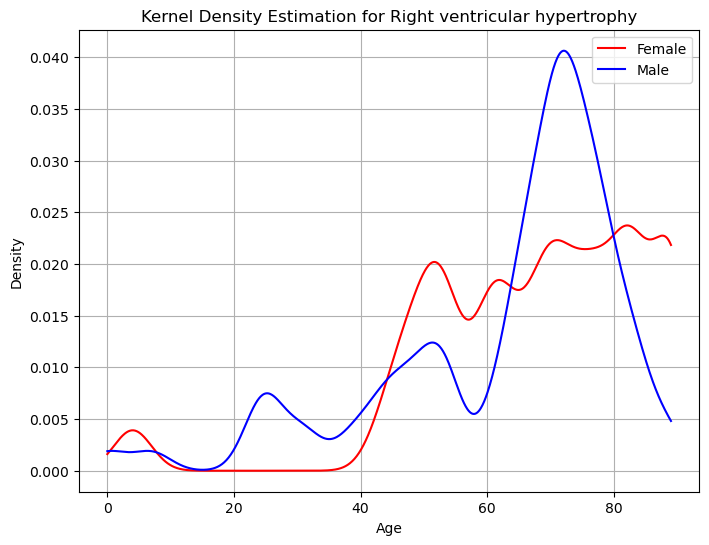

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


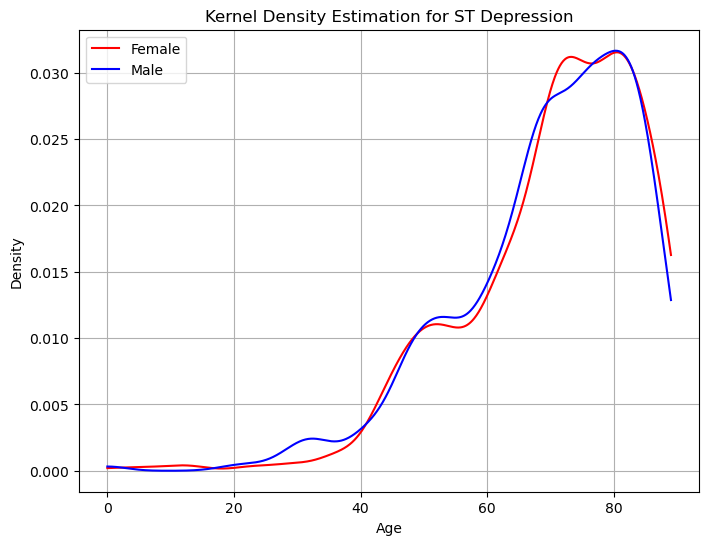

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


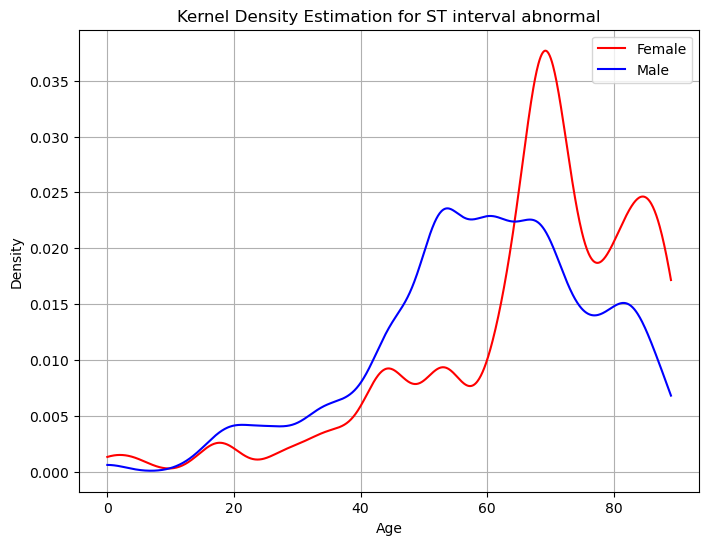

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


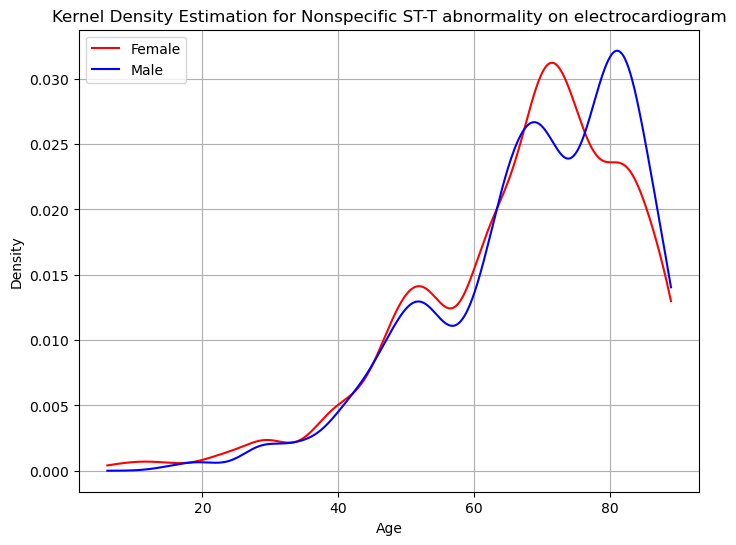

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


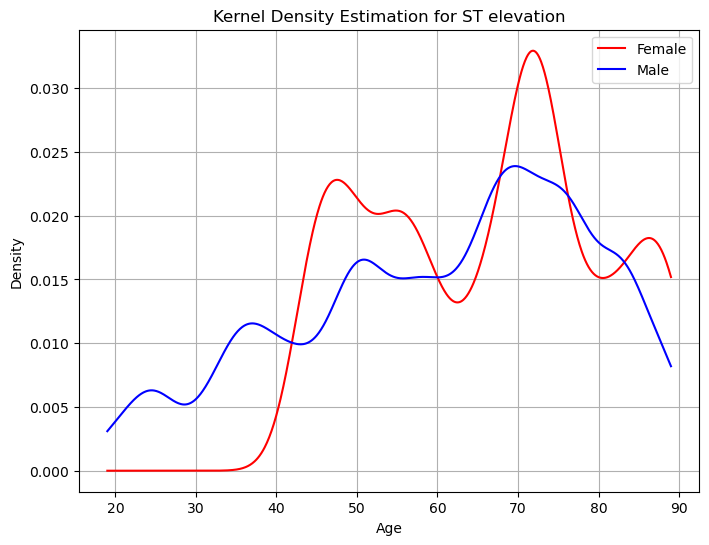

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


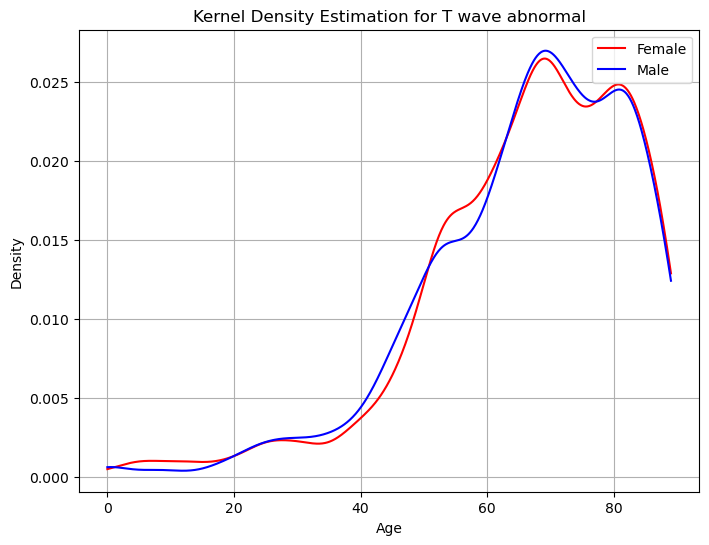

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


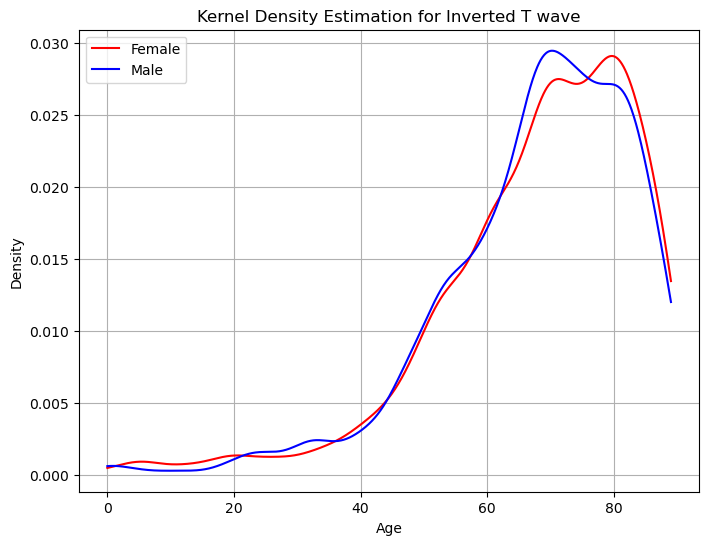

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


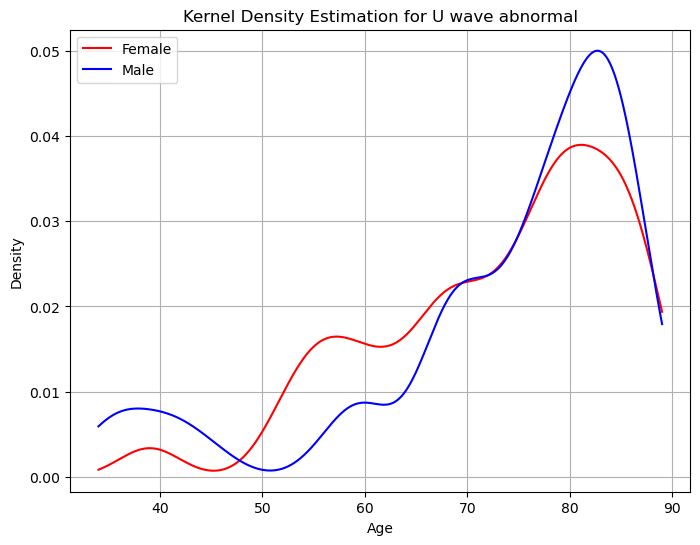

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


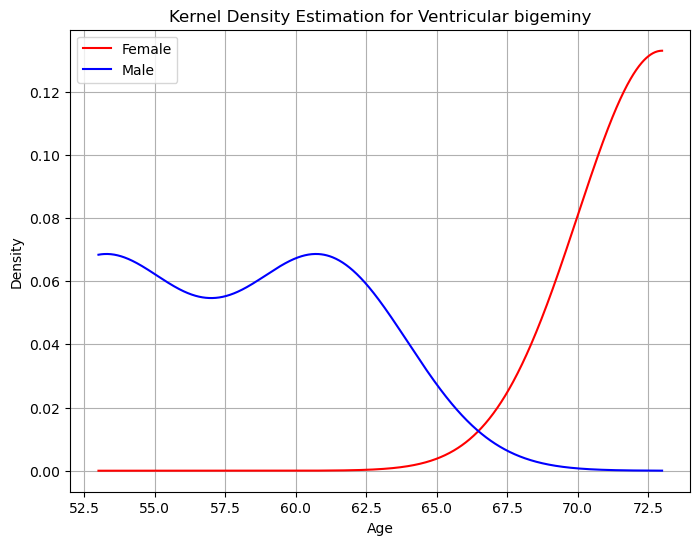

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


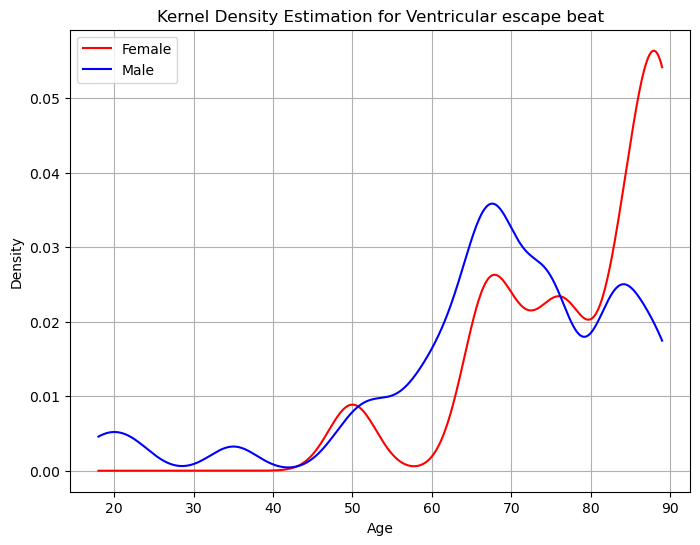

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


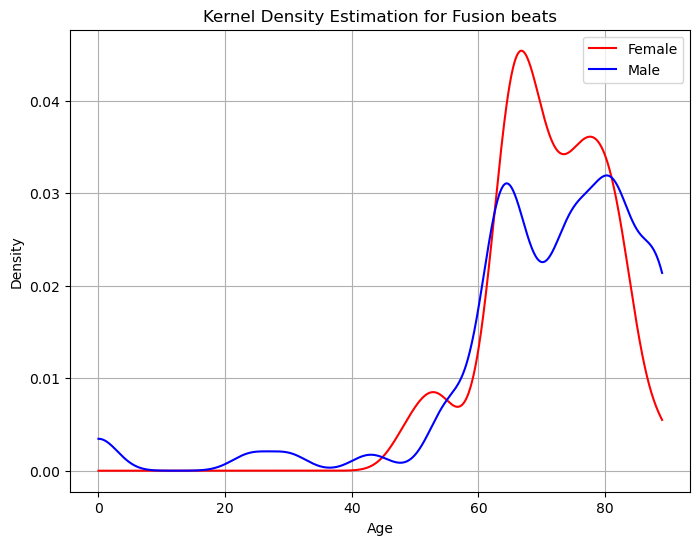

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


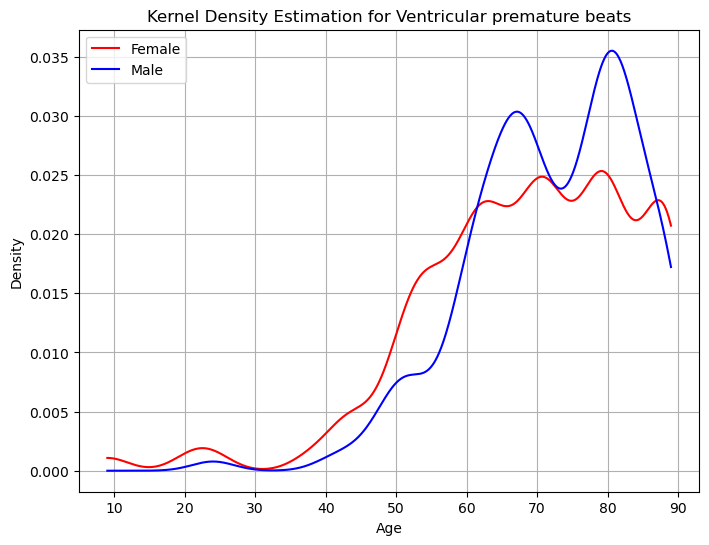

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


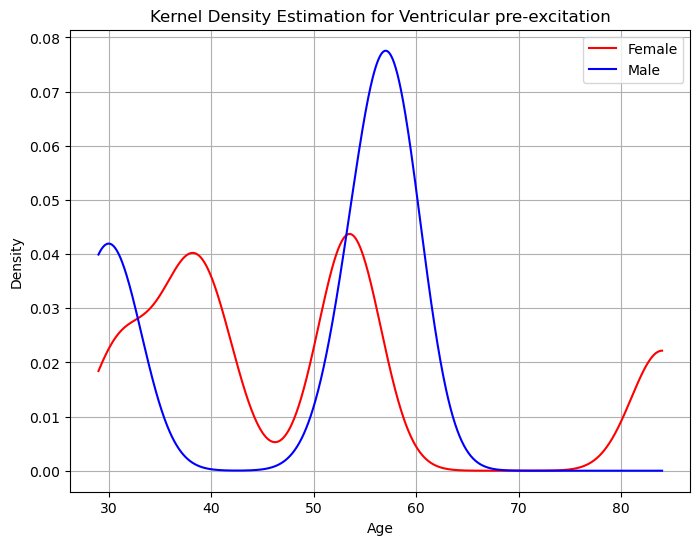

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


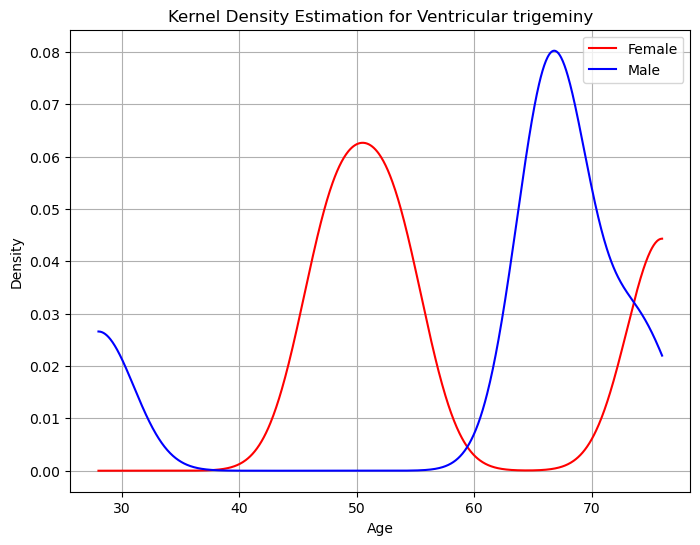

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


Not enough data for 'Wandering atrial pacemaker' category.


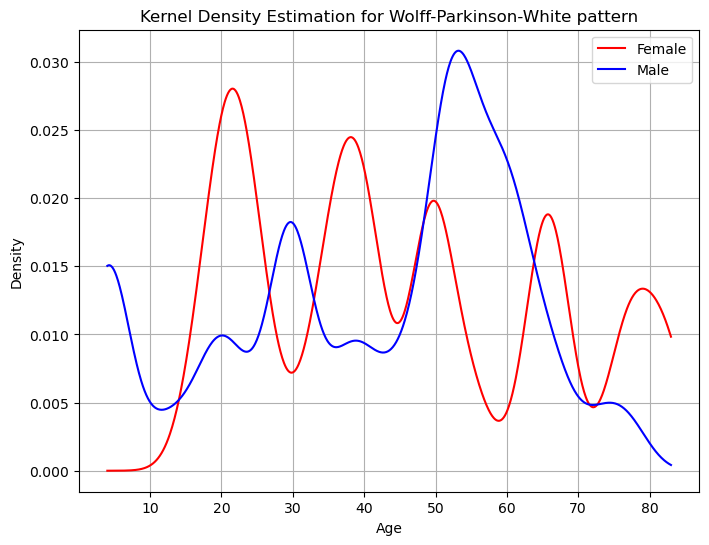

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


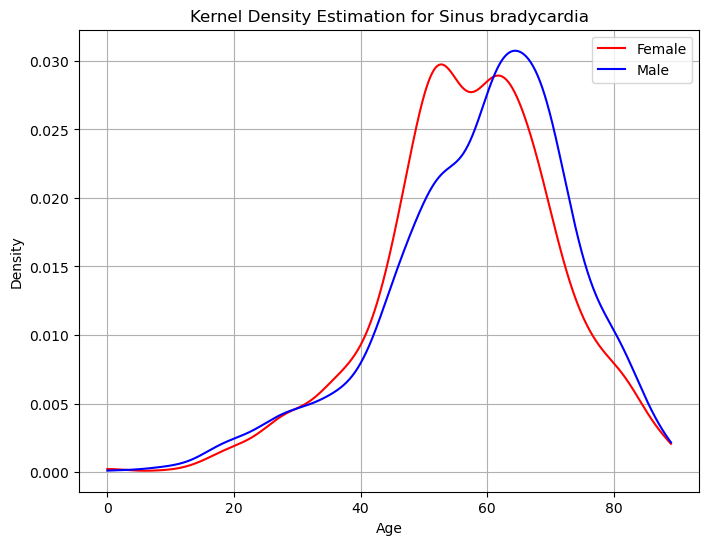

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


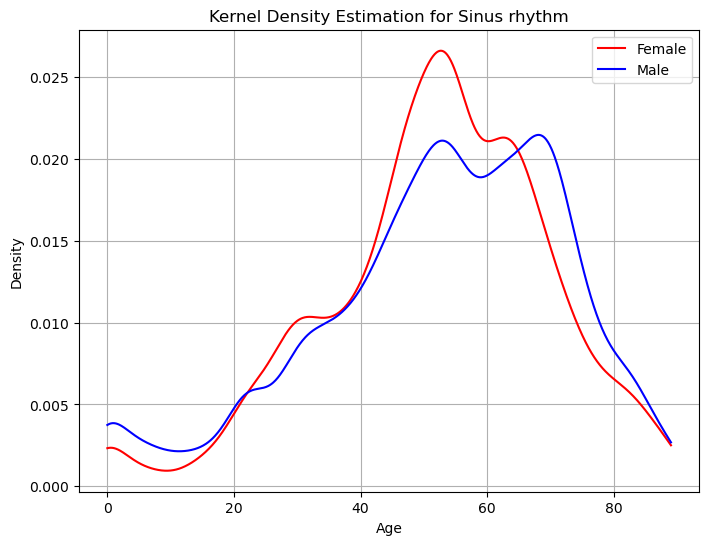

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


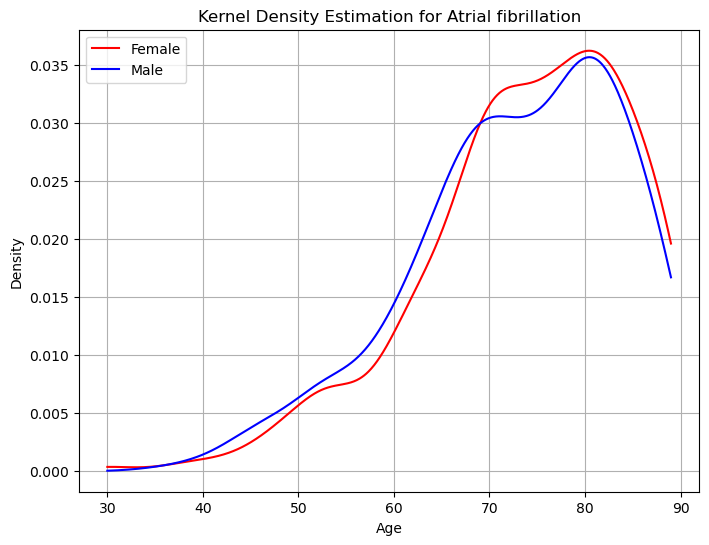

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


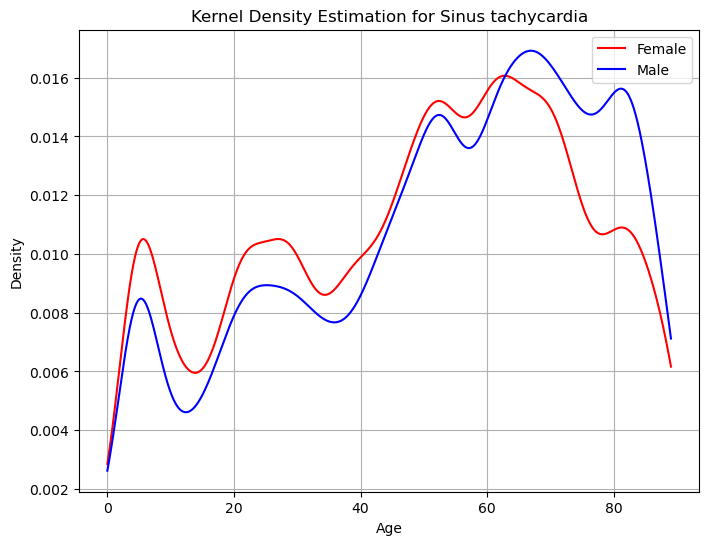

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


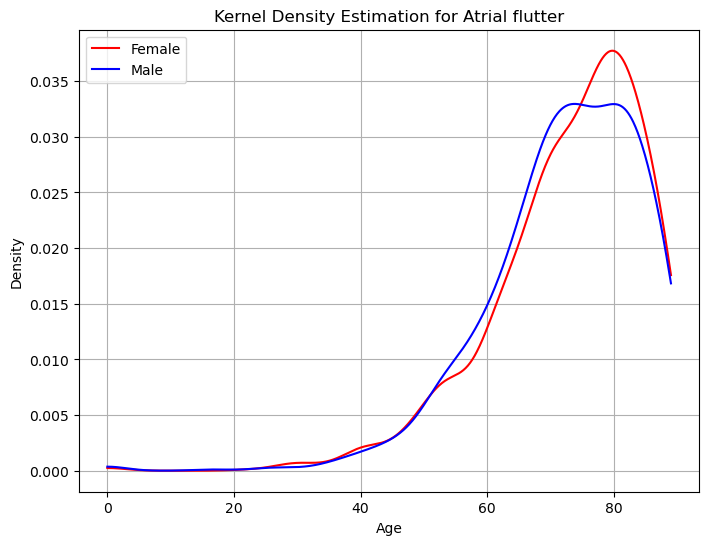

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


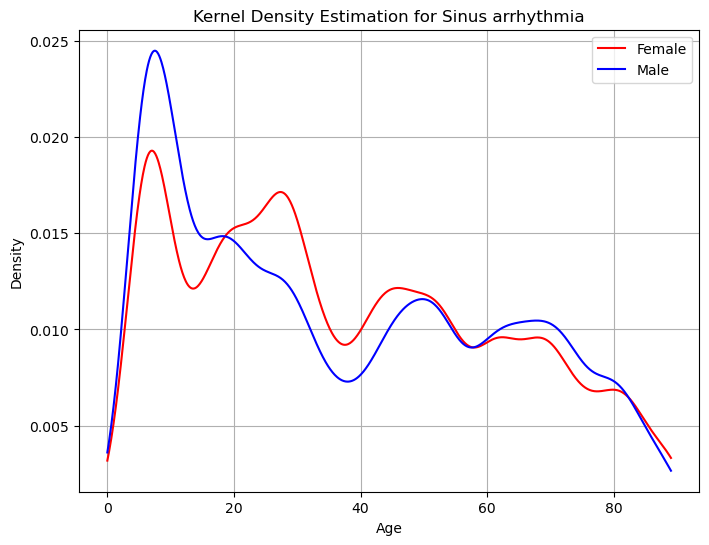

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


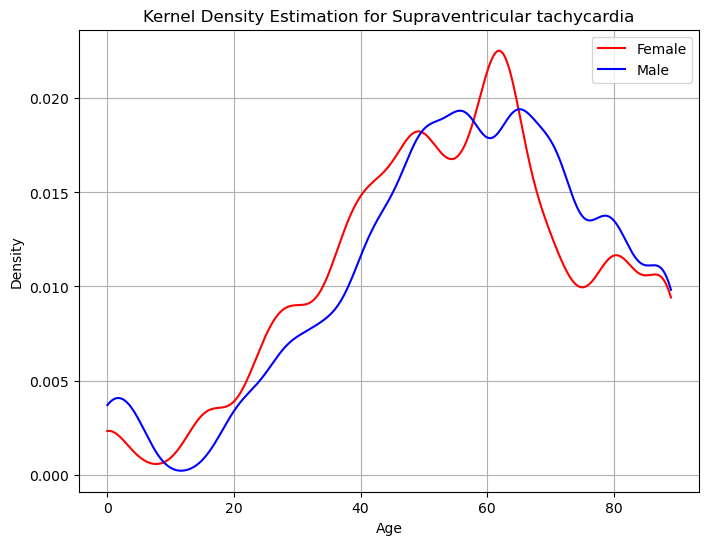

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


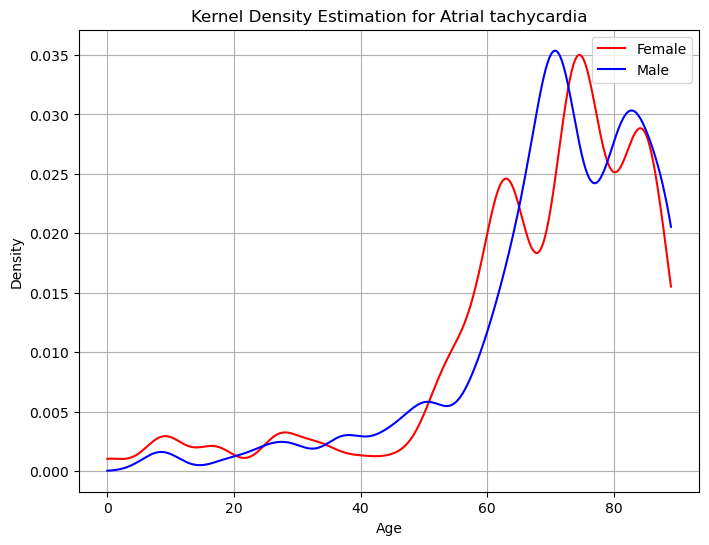

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


Not enough data for 'Re-entrant atrioventricular node tachycardia' category.


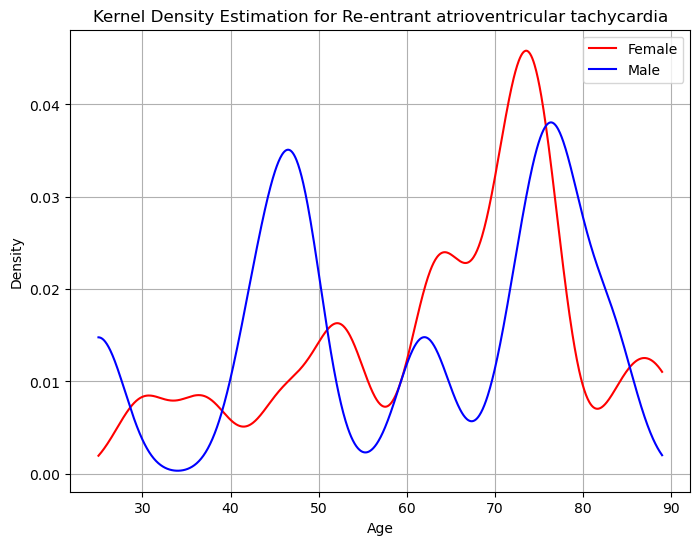

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


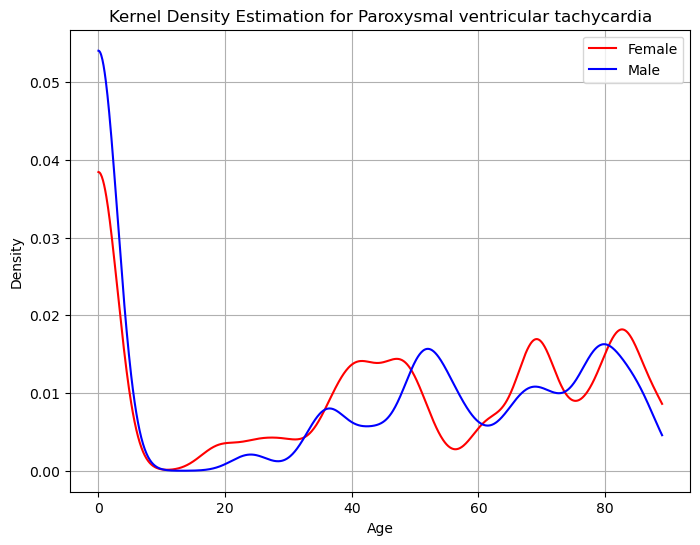

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


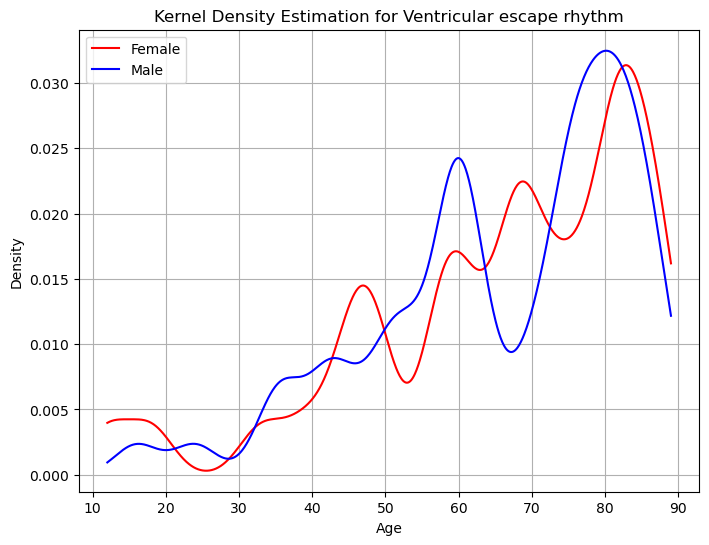

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


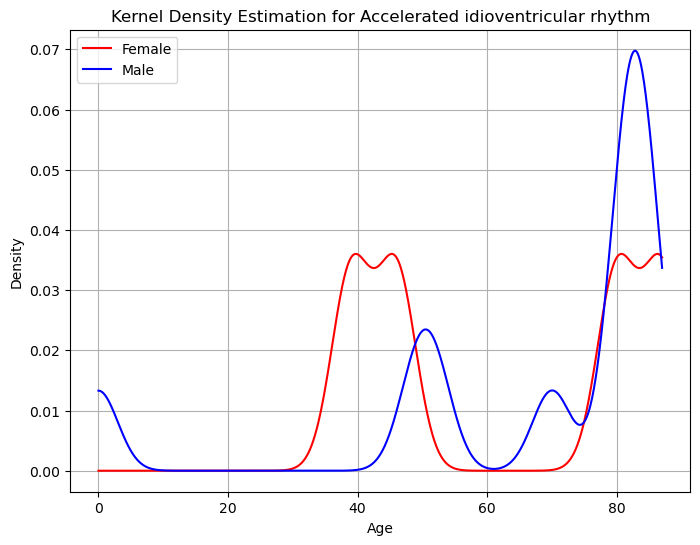

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


Not enough data for 'Shortened QT interval' category.


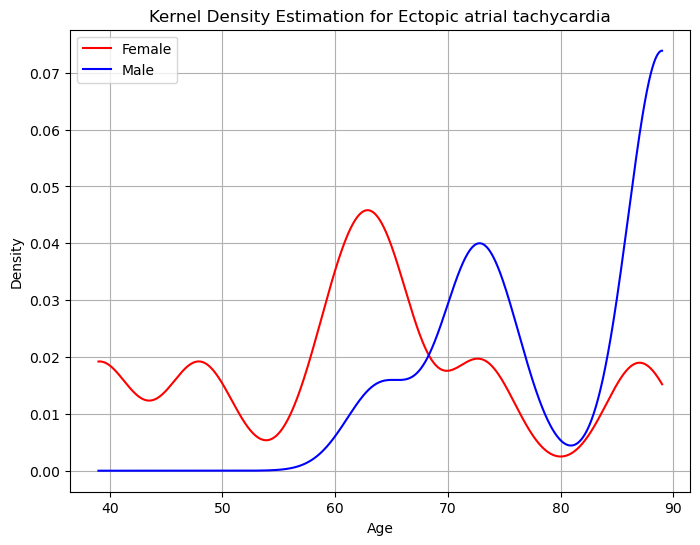

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


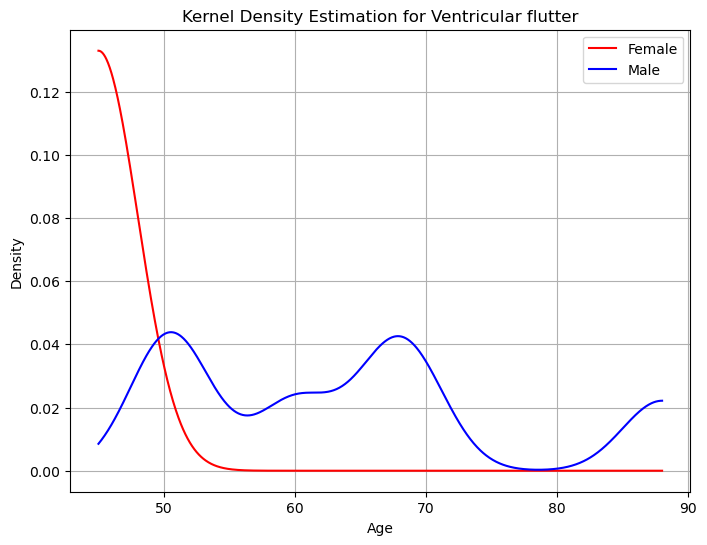

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


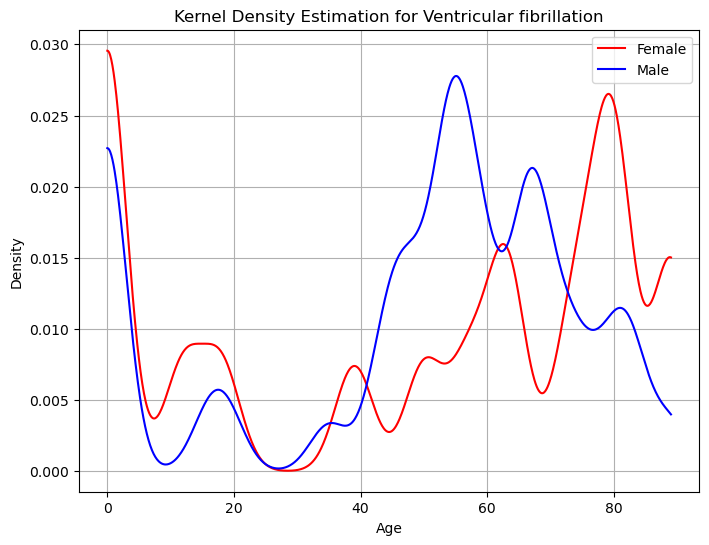

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


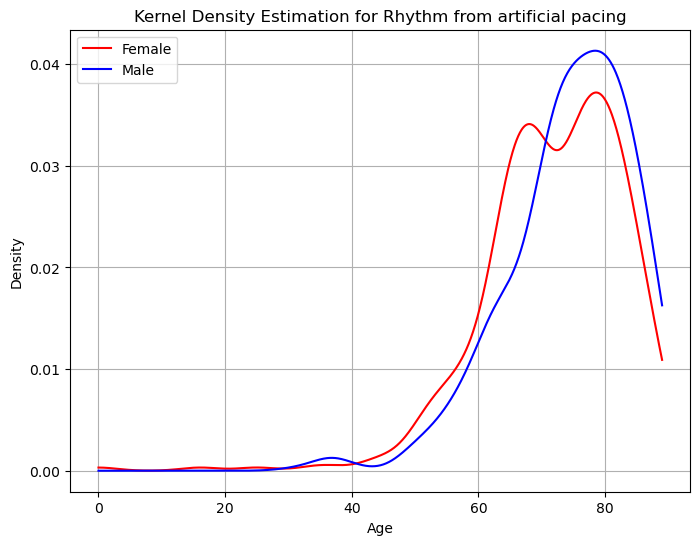

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


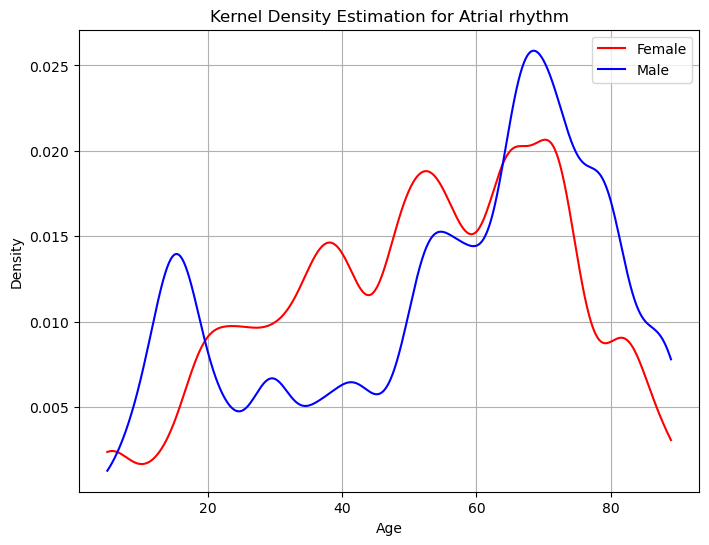

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


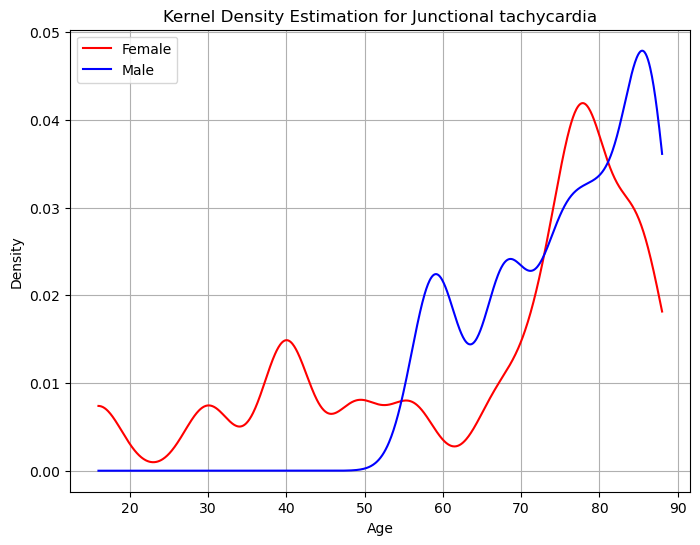

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


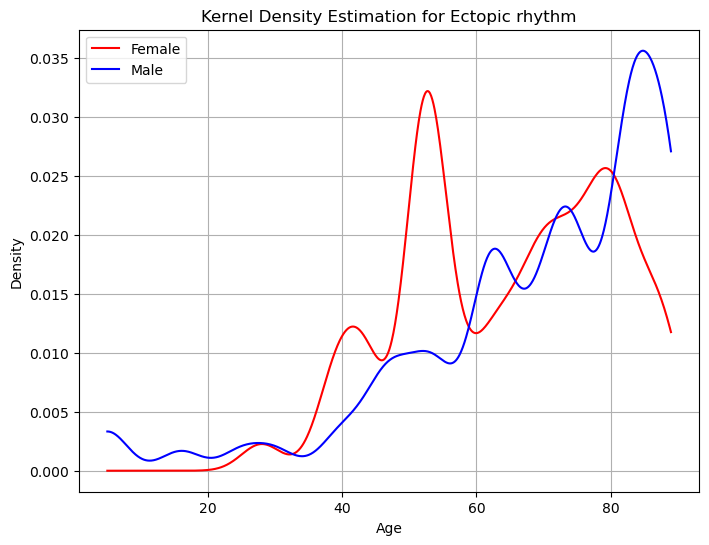

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


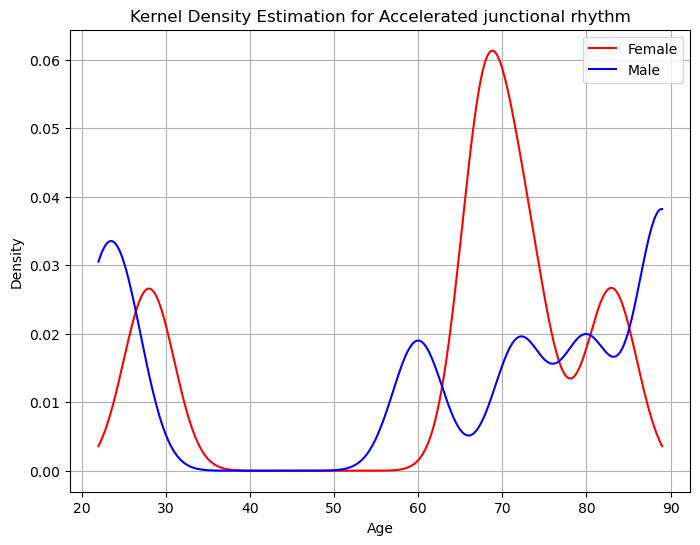

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


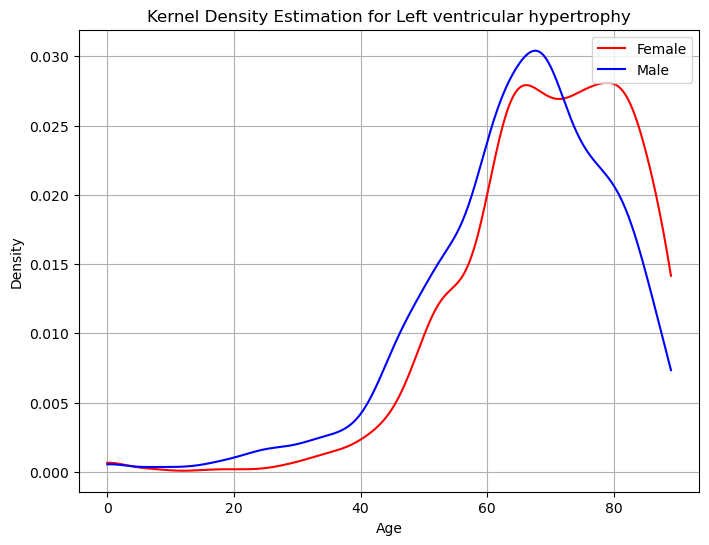

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


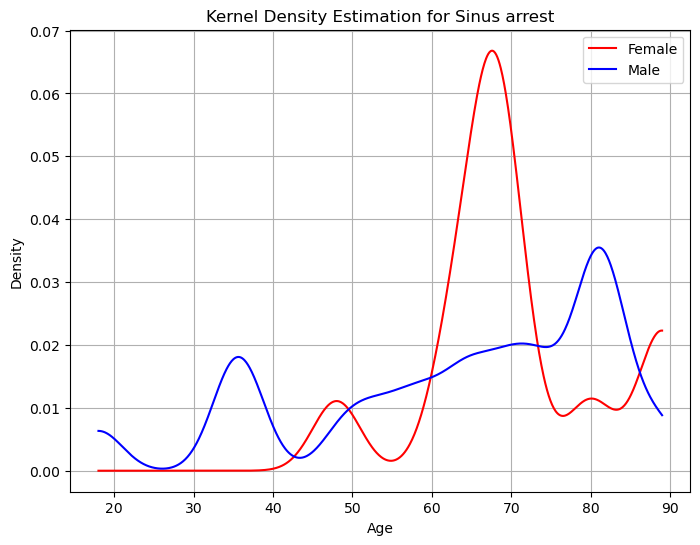

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


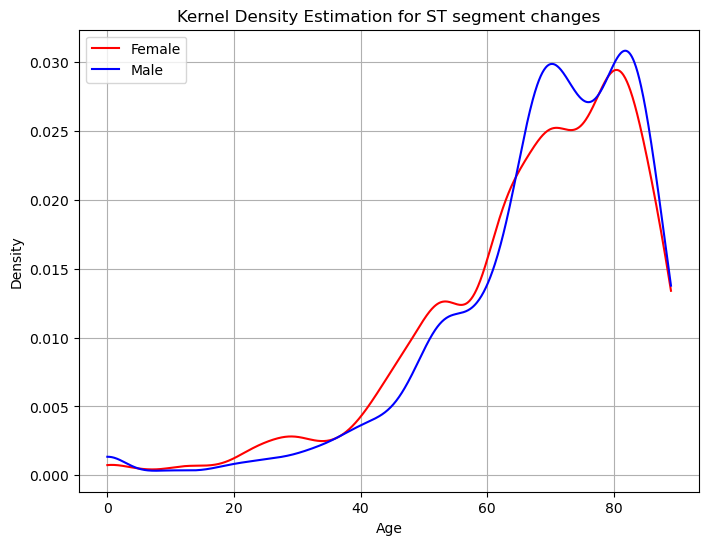

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


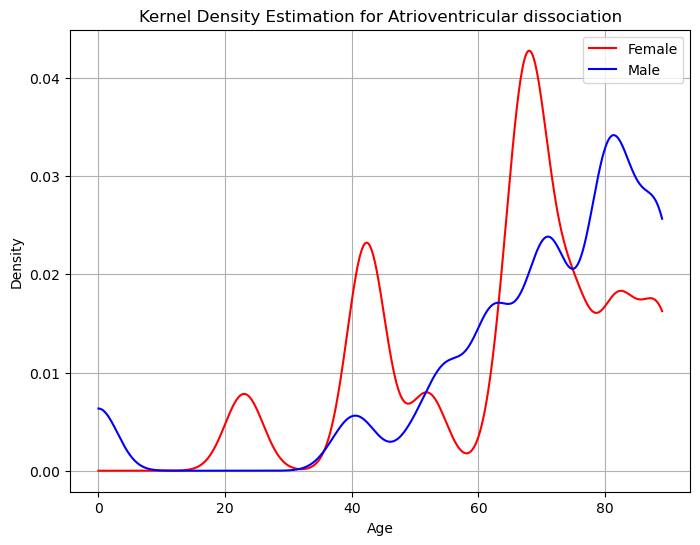

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


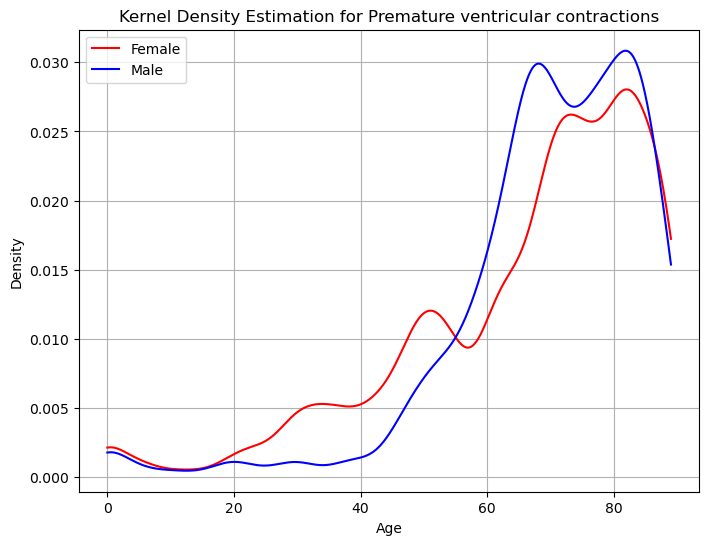

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


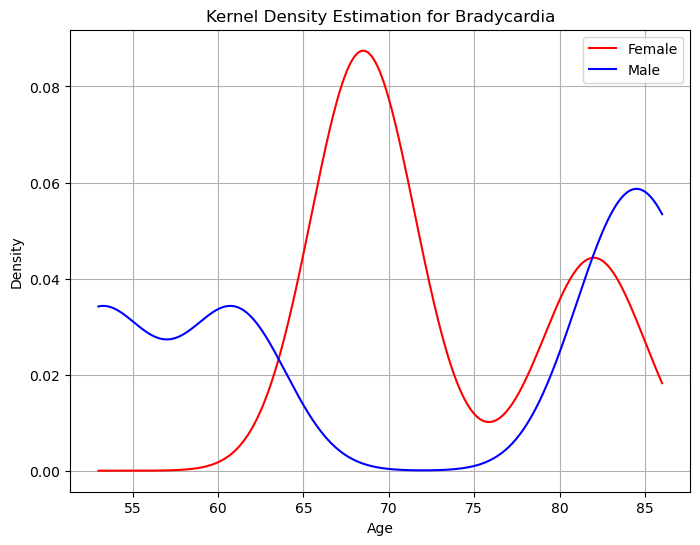

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


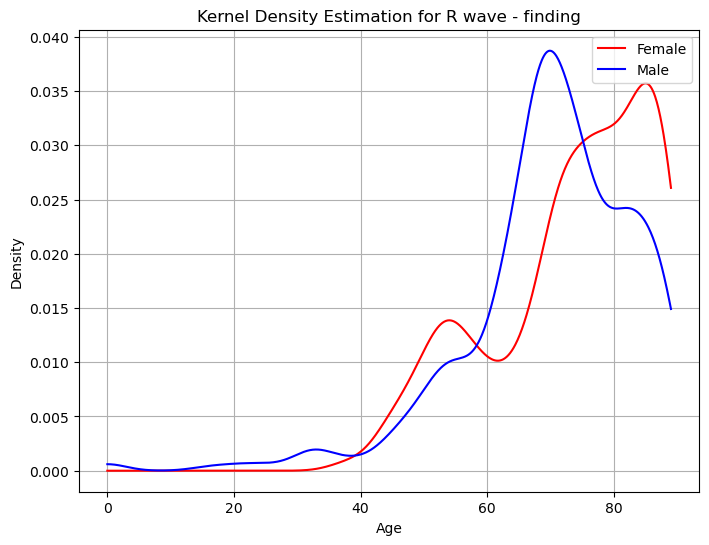

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


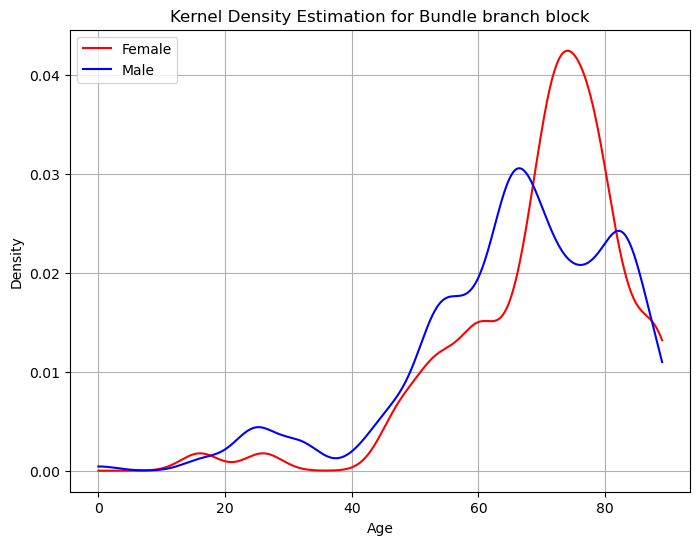

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


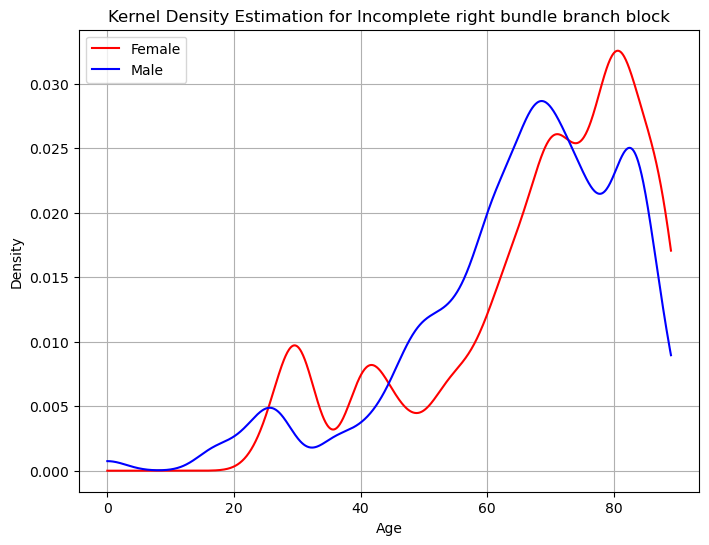

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


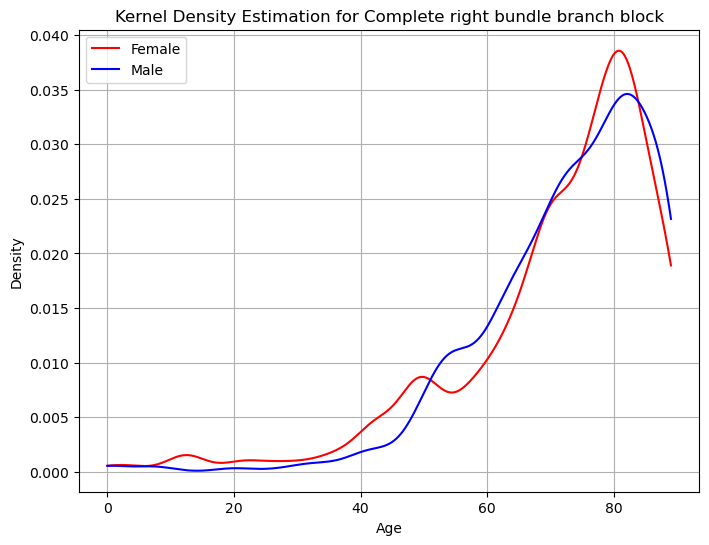

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


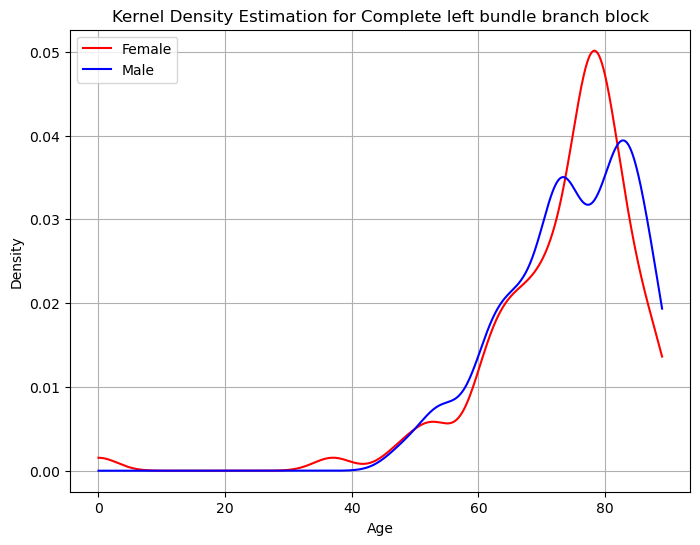

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


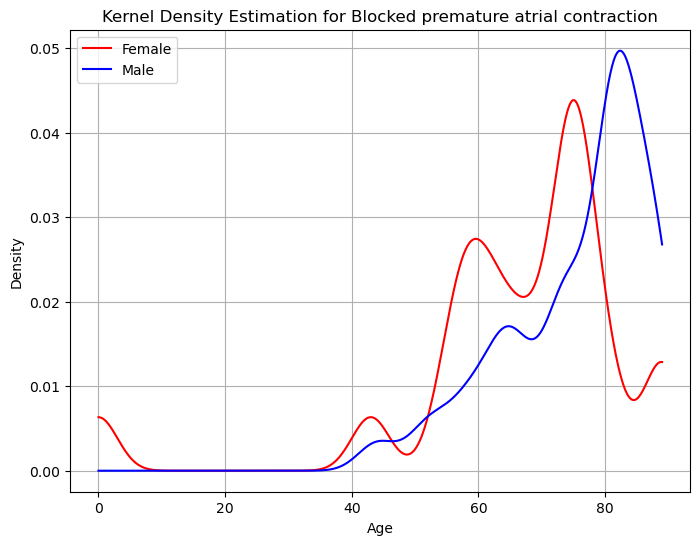

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


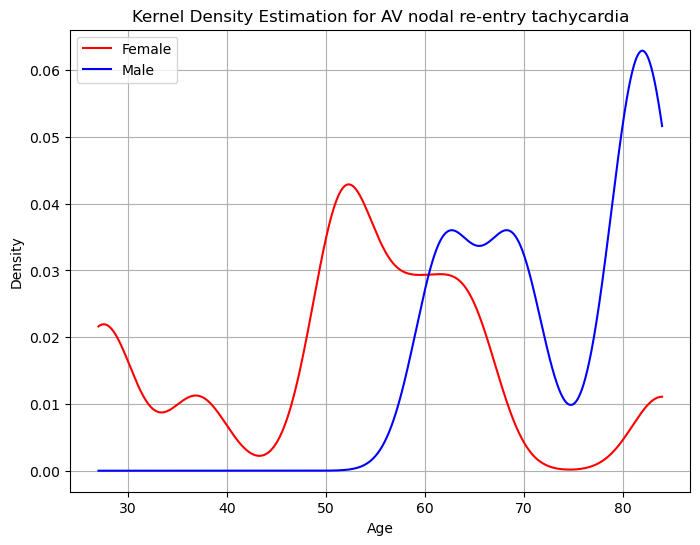

/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(
/Users/marcsilverman/anaconda3/envs/cs_7641_group_proj/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  warnings.warn(


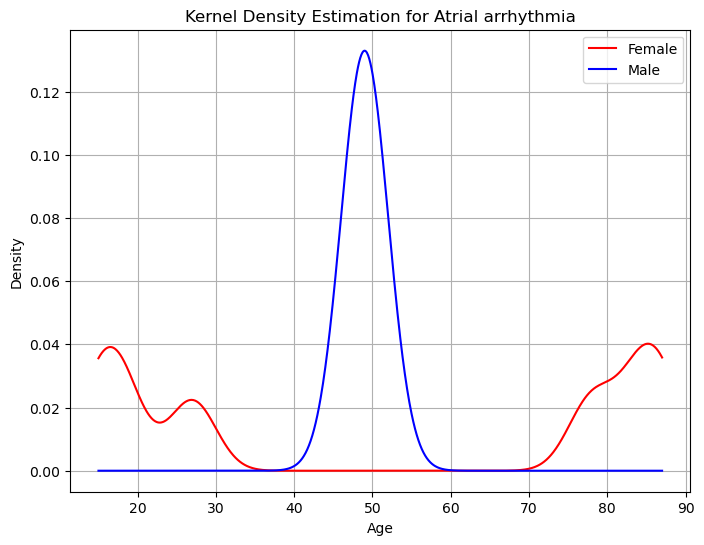

In [13]:
# Define selected columns
selected_columns = ['age', 'snomed_concept_name', 'sex_Female', 'sex_Male']

# Create a new DataFrame containing only the selected columns
selected_data = df[selected_columns]

# Initialize a dictionary to store KDE models
kde_models = {}

# Fit Kernel Density Estimation separately for each category of 'snomed_concept_name'
for snomed_concept_name, group_data in selected_data.groupby('snomed_concept_name'):
    # Select data for the current category
    category_data = group_data.drop(columns=['snomed_concept_name'])

    # Split the data by sex
    female_data = category_data[category_data['sex_Female'] == 1][['age']]
    male_data = category_data[category_data['sex_Male'] == 1][['age']]

    # Check if there is enough data for the current category
    if len(female_data) > 0 and len(male_data) > 0:
        # Initialize and fit KDE models for each sex
        kde_female = KernelDensity(bandwidth=3.0, kernel='gaussian')
        kde_female.fit(female_data)

        kde_male = KernelDensity(bandwidth=3.0, kernel='gaussian')
        kde_male.fit(male_data)

        # Store the fitted KDE models
        kde_models[(snomed_concept_name, 'Female')] = kde_female
        kde_models[(snomed_concept_name, 'Male')] = kde_male

        # Plot the KDE models for continuous features
        plt.figure(figsize=(8, 6))
        x_plot = np.linspace(min(female_data['age'].min(), male_data['age'].min()),
                             max(female_data['age'].max(), male_data['age'].max()),
                             1000)

        log_dens_female = kde_female.score_samples(x_plot.reshape(-1, 1))
        log_dens_male = kde_male.score_samples(x_plot.reshape(-1, 1))

        plt.plot(x_plot, np.exp(log_dens_female), color='red',label='Female')
        plt.plot(x_plot, np.exp(log_dens_male), color='blue',label='Male')

        plt.xlabel('Age')
        plt.ylabel('Density')
        plt.title(f'Kernel Density Estimation for {snomed_concept_name}')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"Not enough data for '{snomed_concept_name}' category.")